In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
boston=datasets.load_boston()

In [3]:
data_boston=pd.DataFrame(boston.data,columns=boston.feature_names)

In [7]:
data_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
#model = KMeans(n_clusters=4, random_state=123)

In [52]:
from sklearn.decomposition import PCA

In [53]:
PCA = PCA(n_components=2)
PCA1=PCA.fit_transform(boston.data)

In [54]:
PCA.explained_variance_ratio_.sum()

0.9688751429772724

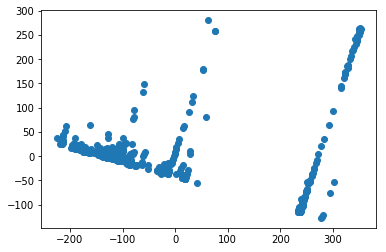

In [55]:
plt.scatter(PCA1[:,0],PCA1[:,1],cmap='viridis')

# KMeans

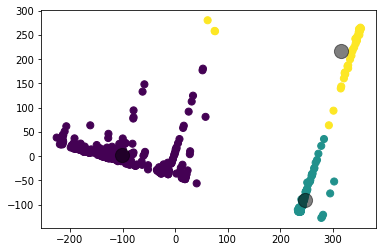

In [56]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(PCA1)
y_kmeans = kmeans.predict(PCA1)

plt.scatter(PCA1[:, 0], PCA1[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [127]:
from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(PCA1, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(PCA1)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(PCA1)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(PCA1)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (boston.data[i, 0] - curr_center[0]) ** 2 + (boston.data[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

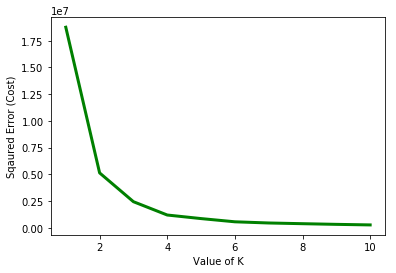

In [116]:
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(X) 
    
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_) 

# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

# the point of the elbow is the 
# most optimal value for choosing k 


Text(0.5,1,'Silouette for K-means')

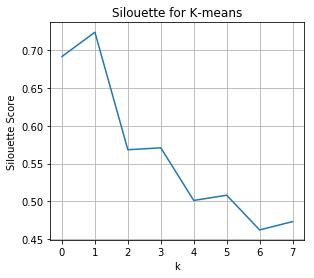

In [120]:
from sklearn.metrics import silhouette_score
from matplotlib import cm
score = []
for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(boston.data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    score.append(silhouette_score(boston.data, labels, metric='euclidean'))
# Set the size of the plot
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(score)
plt.grid(True)
plt.ylabel("Silouette Score")
plt.xlabel("k")
plt.title("Silouette for K-means")

IndexError: boolean index did not match indexed array along dimension 0; dimension is 506 but corresponding boolean dimension is 3

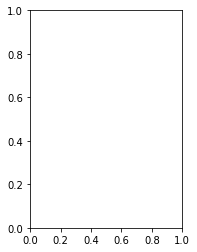

In [124]:
# Initialize the clusterer with n_clusters value and a random generator
from sklearn.metrics import silhouette_samples
model = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)
model.fit_predict(PCA1)
cluster_labels = np.unique(model.labels_)
n_clusters = cluster_labels.shape[0]

# Compute the silhouette scores for each sample
silhouette_vals = silhouette_samples(PCA1, model.labels_)
plt.subplot(1, 2, 2)
y_lower, y_upper = 0,0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[cluster_labels ==c]
    c_silhouette_vals.sort()
    y_upper += len(c_silhouette_vals)
    color = cm.spectral(float(i) / n_clusters)
    plt.barh(range(y_lower, y_upper), c_silhouette_vals, facecolor=color,
    edgecolor=color, alpha=0.7)
    yticks.append((y_lower + y_upper) / 2)
    y_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.yticks(yticks, cluster_labels+1)
plt.yticks(yticks, cluster_labels+1)
# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title("Silouette for K-means")
plt.show()

In [125]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(PCA1)
  labels = kmeans.labels_
  sil.append(silhouette_score(PCA1, labels, metric = 'euclidean'))


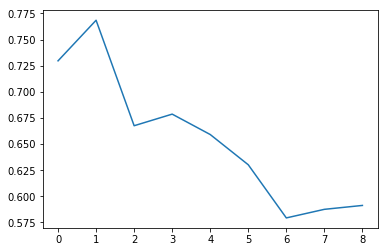

In [126]:
plt.plot(sil)

# EM Clustering

#### Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster. Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.

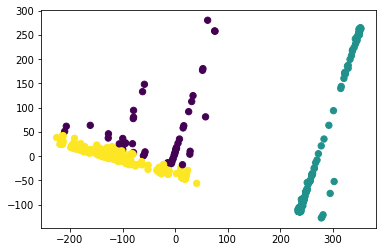

In [91]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=3).fit(PCA1)
labels = gmm.predict(PCA1)
plt.scatter(PCA1[:, 0], PCA1[:, 1],c=labels, s=40, cmap='viridis');

# Density-based spatial clustering of applications with noise (DBSCAN) clustering

* minPts: The minimum number of points (a threshold) huddled together for a region to be considered dense.
* eps (ε): A distance measure that will be used to find the points in the neighborhood of any point.

In [151]:
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
PCA1 = scaler.fit_transform(PCA1)

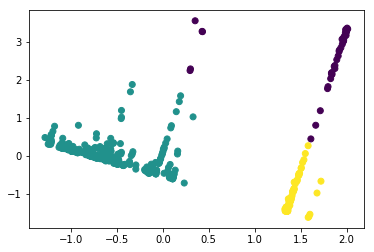

In [165]:
db = DBSCAN(eps=1,min_samples=100).fit_predict(PCA1)
plt.scatter(PCA1[:,0],PCA1[:,1],c=db)

#### I have observed ,we found different number of clusters as change  the value of eps and minpts.
##### We found above clusters at eps=1 and minpts=100


# Hierarchical Clustering

In [193]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [194]:
hc = linkage(PCA1, method="single", metric="euclidean")
Z.shape

(505, 4)

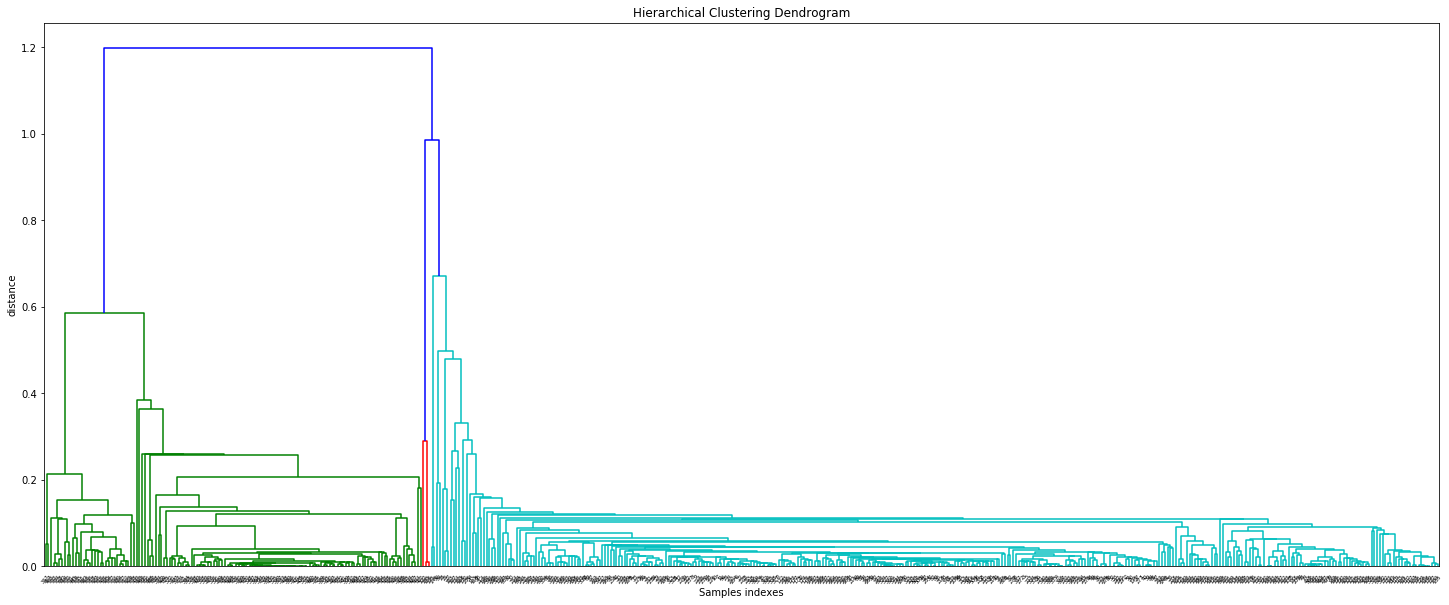

In [195]:
plt.figure(figsize=(25, 10))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples indexes")
plt.ylabel("distance")
dendrogram(hc, leaf_rotation=50., leaf_font_size=5. ) 
plt.show()

In [206]:
cluster = fcluster(hc, 1, criterion="distance")
cluster

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

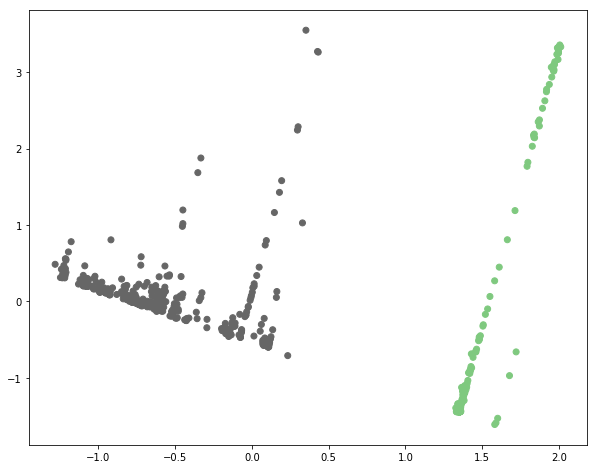

In [207]:
plt.figure(figsize=(10, 8))
plt.scatter(PCA1[:, 0], PCA1[:, 1], c=cluster, cmap="Accent")
plt.show()

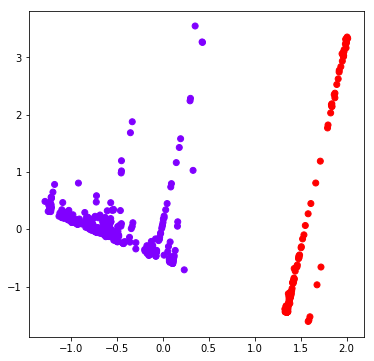

In [189]:
ac2 = AgglomerativeClustering(n_clusters = 2,linkage="single") 

# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(PCA1[:,0], PCA1[:,1],c = ac2.fit_predict(PCA1), cmap ='rainbow') 
plt.show() 
